In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("breast-cancer-diagnostic.csv")
df.drop(['id'], axis=1, inplace=True)
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
#there are no missing values

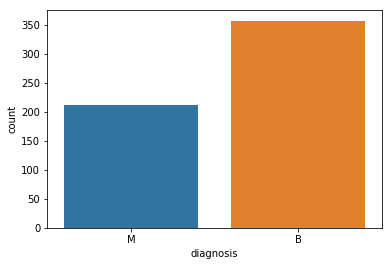

In [4]:
sns.countplot(df['diagnosis']) #target feature is not balanced #CHANGE COLOR

# KNN using all features, unmodified

In [14]:
def cross_validateK(x_train, y_train):
    neighbors = [] 
    cv_scores = []
  
    # perform 10 fold cross validation 
    for k in range(1, 31): 
        neighbors.append(k) 
        knn = KNeighborsClassifier(n_neighbors = k) 
        scores = cross_val_score( 
            knn, x_train, y_train, cv = 10, scoring = 'accuracy') 
        cv_scores.append(scores.mean())
        
    bestK = neighbors[cv_scores.index(np.max(cv_scores))]
    return bestK

In [15]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [16]:
cross_validateK(x, y) #best k for original data = 14

14

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

knn = KNeighborsClassifier(n_neighbors=cross_validateK(x, y))

skf = StratifiedKFold(n_splits=10)

scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))    
    #print(confusion_matrix(y_test, knn.predict(x_test)))    
print(np.mean(scores))

0.9335050989542821


# Min-Max Scaling

In [38]:
df_copy = df.copy()
scaler = MinMaxScaler()
features = [[column for column in x.columns]]
for feature in features:
    df_copy[feature] = scaler.fit_transform(df_copy[feature])
x_copy = df_copy.drop(columns=['diagnosis'])
y_copy = df_copy['diagnosis']

In [39]:
knn_scaled = KNeighborsClassifier(n_neighbors=cross_validateK(x_copy, y_copy))

skf = StratifiedKFold(n_splits=10)

scores = []

for train_index, test_index in skf.split(x_copy, y_copy):
    x_train, x_test = x_copy.loc[train_index], x_copy.loc[test_index]
    y_train, y_test = y_copy.loc[train_index], y_copy.loc[test_index]
    
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))    
    #print(confusion_matrix(y_test, knn.predict(x_test)))    
print(np.mean(scores))

0.9649090398409816


# Correlation Heatmap

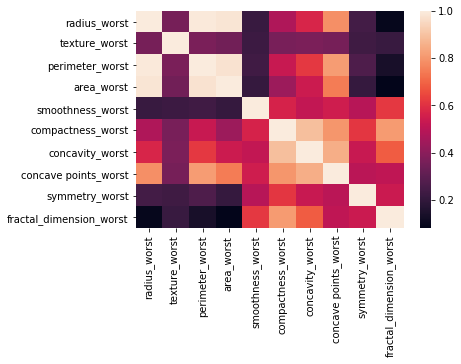

<Figure size 864x1296 with 0 Axes>

In [42]:
#For all the "worst" features

features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
            'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
            'fractal_dimension_worst']
df_new = df[features_worst]
corr = df_new.corr()
sns.heatmap(corr, fmt='.2f')
fig = plt.figure(figsize=(12,18))

# KNN using all worst features

In [47]:
#unscaled
x_worst = df[features_worst]
y_worst = df['diagnosis']

knn_worst = KNeighborsClassifier(n_neighbors=cross_validateK(x_worst, y_worst))
skf = StratifiedKFold(n_splits=10)
scores = []

for train_index, test_index in skf.split(x_worst, y_worst):
    x_train, x_test = x_worst.loc[train_index], x_worst.loc[test_index]
    y_train, y_test = y_worst.loc[train_index], y_worst.loc[test_index]
    
    knn_worst.fit(x_train, y_train)
    scores.append(knn_worst.score(x_test, y_test))    
    #print(confusion_matrix(y_test, knn.predict(x_test)))    
print(np.mean(scores))

0.9230101114856104


In [56]:
#using min-max scaling
x_worst_copy = x_worst.copy()
scaler = MinMaxScaler()
features = [[column for column in x_worst.columns]]
for feature in features:
    x_worst_copy[feature] = scaler.fit_transform(x_worst_copy[feature])
x_copy2 = x_worst_copy
y_copy2 = df['diagnosis']
print(x_copy2.shape)

(569, 10)


In [57]:
#scaled "worst" KNN
knn_worst_scaled = KNeighborsClassifier(n_neighbors=cross_validateK(x_copy2, y_copy2))
skf = StratifiedKFold(n_splits=10)
scores = []

for train_index, test_index in skf.split(x_copy2, y_copy2):
    x_train, x_test = x_copy2.loc[train_index], x_copy2.loc[test_index]
    y_train, y_test = y_copy2.loc[train_index], y_copy2.loc[test_index]
    
    knn_worst.fit(x_train, y_train)
    scores.append(knn_worst.score(x_test, y_test))    
    #print(confusion_matrix(y_test, knn.predict(x_test)))    
print(np.mean(scores))

0.9632140696569007


Scaled KNN using worst features performed slightly less than the original with scaling.

# Visualizing to figure out which of select "worst" features are important

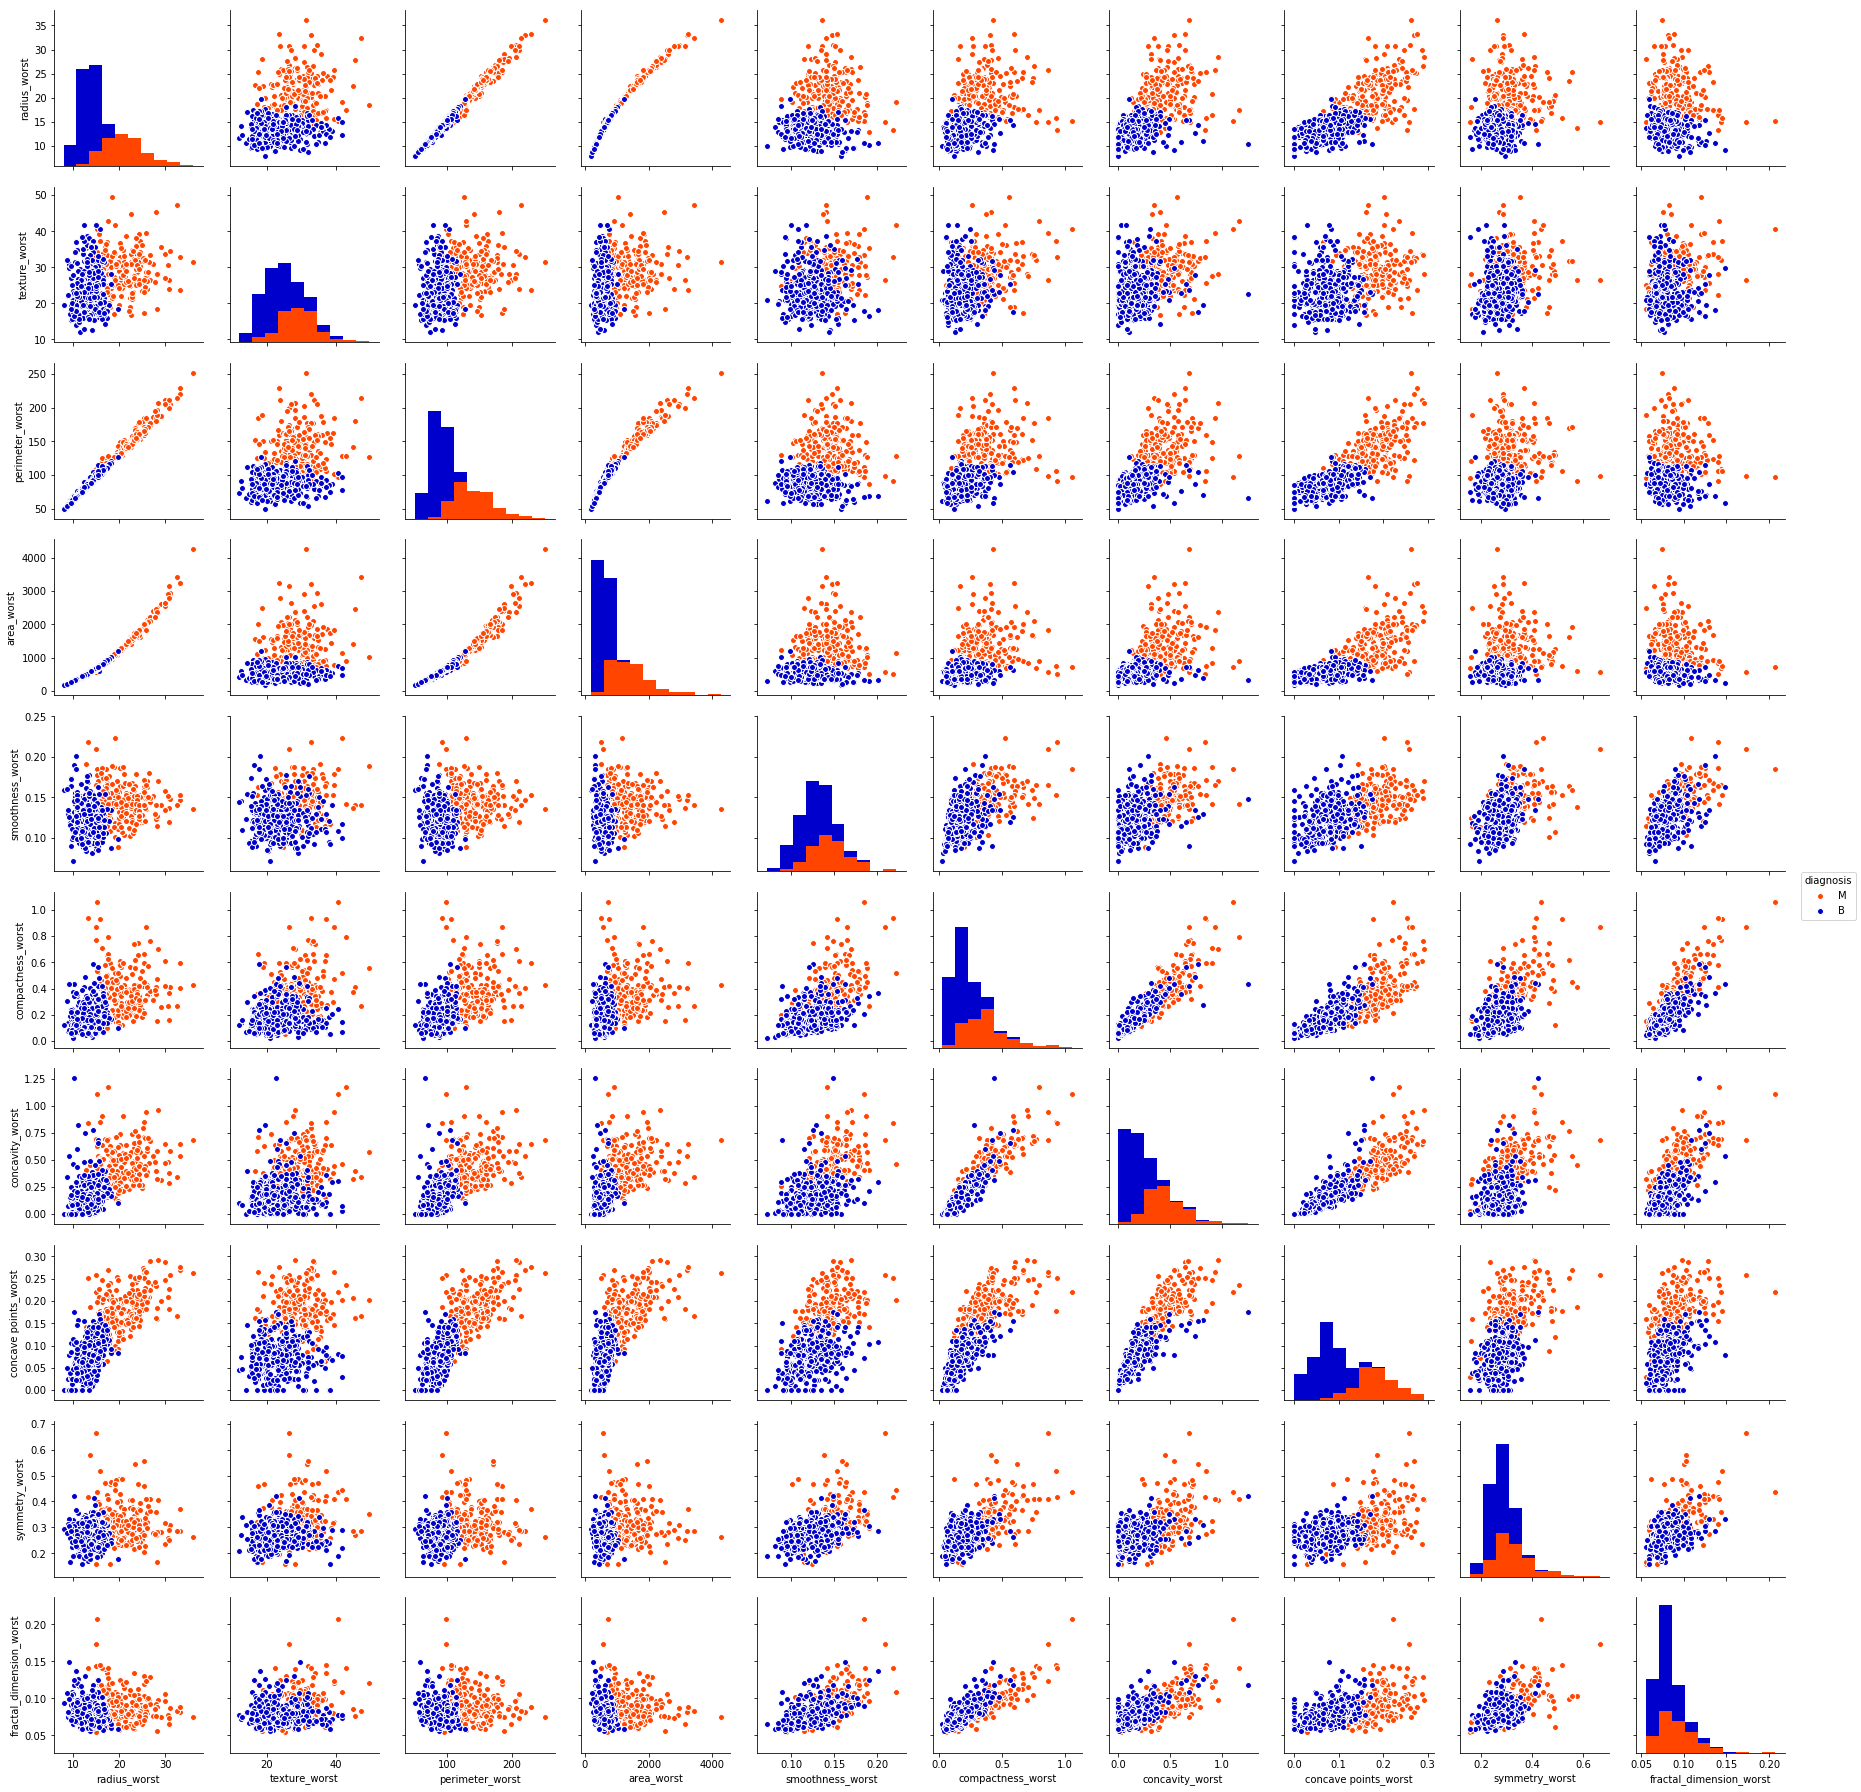

In [44]:
#Using worst features
color_dict = dict({'M':'orangered','B':'mediumblue',})
sns.pairplot(df, hue = 'diagnosis', vars = features_worst, palette=color_dict)

# KNN using just radius_worst and texture_worst